In [45]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Generate dataset

<Axes: >

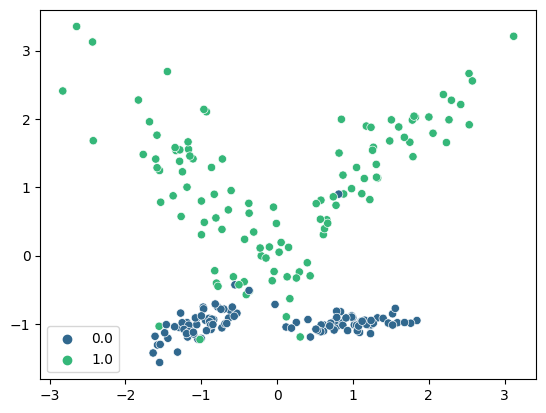

In [78]:
circ_X, circ_y = datasets.make_classification(n_samples=300, n_features=2, n_redundant=0, )
data = np.insert(circ_X, obj=2, values=circ_y , axis=1)
train, test = train_test_split(data, shuffle=True)
sb.scatterplot(x=train[:, 0], y=train[:, 1], hue=train[:, 2], palette='viridis')

# Train Ridge Classifier

In [79]:
ridge = RidgeClassifier(alpha=10)
ridge.fit(train[:, [0,1]], train[:, 2])

RidgeClassifier(alpha=10)

# Plot decision boundary

<Axes: >

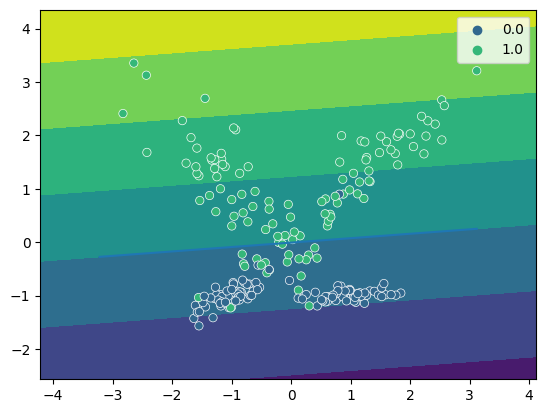

In [80]:
a, b, c = ridge.coef_[0][0], ridge.coef_[0][1], ridge.intercept_[0]
x_min = min(data[:, 0])
y_min = -1*(a*x_min + c)/b
x_max = max(data[:, 0])
y_max = -1*(a*x_max + c)/b
line = np.linspace(start=[x_min, y_min], stop=[x_max, y_max])

img = DecisionBoundaryDisplay.from_estimator(ridge, circ_X, )
sb.lineplot(x=line[:, 0], y=line[:, 1], ax=img.ax_)
sb.scatterplot(x=train[:, 0], y=train[:, 1], hue=train[:, 2], ax=img.ax_, palette='viridis')